# Exploratory Analysis of the Reviews

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval
from collections import Counter
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt # for Data visualization

%matplotlib inline


## Se usa sólo el primer chunk

In [17]:
review_json_path = './yelp_dataset/yelp_academic_dataset_review.json'
i= 0
size= 10000
df= pd.DataFrame()

In [18]:
with  pd.read_json(review_json_path, lines=True,chunksize=size) as reader:
    for chunk in reader:
        print(f"{chunk.shape[0]} out of {size:,} ")
        df = df.append(chunk)
        if i==0:
            break;

10000 out of 10,000 


In [19]:
print(len(df))

10000


In [20]:
#df

## Analysis of Cross-Features

In [24]:
df['is_useful'] = df.useful.apply(lambda v: int(v > 0))
df['is_cool'] = df.cool.apply(lambda v: int(v > 0))
df['is_funny'] = df.funny.apply(lambda v: int(v > 0))

df['is_funny_useful'] = df.apply(lambda row: row.is_funny and row.is_useful, axis=1)
df['is_funny_cool'] = df.apply(lambda row: row.is_funny and row.is_cool, axis=1)
df['is_useful_cool'] = df.apply(lambda row: row.is_useful and row.is_cool, axis=1)
df['is_all'] = df.apply(lambda row: row.is_funny and row.is_cool and row.is_useful, axis=1)

In [25]:
df_dist = df.groupby('stars').agg({'is_funny': sum,
                                   'is_cool': sum,
                                   'is_useful': sum,
                                   'is_funny_useful': sum,
                                   'is_funny_cool': sum,
                                   'is_useful_cool': sum,
                                   'is_all': sum,
                                   'stars': len})

In [26]:
fields = ['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all']
for field in fields:
    df_dist[field] = df_dist[field] / df_dist.stars

## Distribution of Stars

[Text(0.5, 0, 'Stars'),
 Text(0, 0.5, '# Reviews'),
 Text(0.5, 1.0, 'Distribution of Stars')]

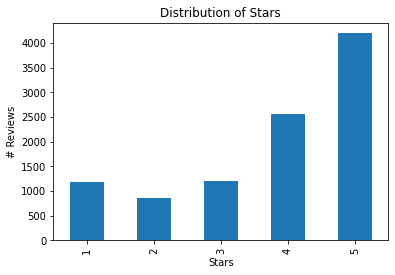

In [27]:
g = df_dist['stars'].plot(kind='bar')
g.set(xlabel='Stars', ylabel='# Reviews', title='Distribution of Stars')

## Proportions of features/cross-features by stars

<ipython-input-28-ae41a573b0c4>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xlabel='Stars', xticklabels=[1,'',2,'',3,'',4,'',5], ylabel='Proportion', title='Features by Stars')


[Text(0.5, 0, 'Stars'),
 [Text(0.5, 0, '1'),
  Text(1.0, 0, ''),
  Text(1.5, 0, '2'),
  Text(2.0, 0, ''),
  Text(2.5, 0, '3'),
  Text(3.0, 0, ''),
  Text(3.5, 0, '4'),
  Text(4.0, 0, ''),
  Text(4.5, 0, '5'),
  Text(5.0, 0, ''),
  Text(5.5, 0, '')],
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Features by Stars')]

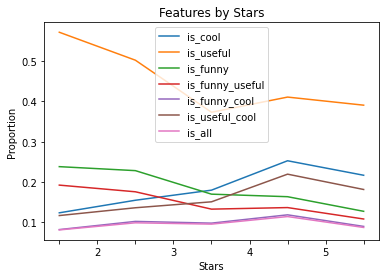

In [28]:
g = df_dist[['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all']].plot()
g.set(xlabel='Stars', xticklabels=[1,'',2,'',3,'',4,'',5], ylabel='Proportion', title='Features by Stars')

In [29]:
df_dist[['is_cool', 'is_useful', 'is_funny', 'is_funny_useful', 'is_funny_cool', 'is_useful_cool', 'is_all', 'stars']]

,is_cool,is_useful,is_funny,is_funny_useful,is_funny_cool,is_useful_cool,is_all,stars
stars,,,,,,,,
1,0.123834,0.571671,0.238338,0.192536,0.082273,0.117048,0.081425,1179
2,0.155012,0.502331,0.228438,0.175991,0.102564,0.136364,0.099068,858
3,0.180017,0.373245,0.170107,0.132948,0.098266,0.151115,0.095789,1211
4,0.252932,0.410868,0.163800,0.136826,0.118843,0.219703,0.114543,2558
5,0.216977,0.390796,0.127563,0.108488,0.090129,0.181688,0.087506,4194


## Cumulative distribution of reviews over businesses

In [30]:
print(len(df.business_id.unique()))

4299


[Text(0.5, 0, '# of Businesses'), Text(0, 0.5, 'Coverage')]

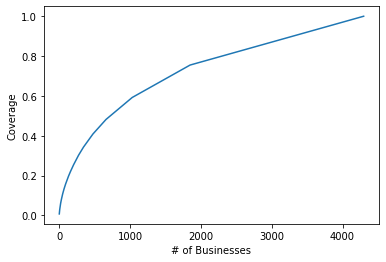

In [32]:
cumulative_rev_count = np.cumsum(sorted(df.groupby('business_id').agg({'user_id': len}).user_id.values, reverse=True))
g = plt.plot(cumulative_rev_count / float(cumulative_rev_count[-1]))
g[0].axes.set(xlabel='# of Businesses', ylabel='Coverage')

## Distribution of review counts by businesses

(array([3.832e+03, 3.520e+02, 6.900e+01, 2.500e+01, 8.000e+00, 8.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <BarContainer object of 9 artists>)

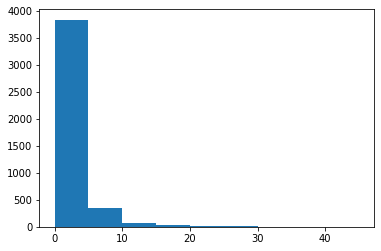

In [33]:
plt.hist(df.groupby('business_id').agg({'user_id': len}).user_id.values, bins=range(0,50,5))

## Cumulative distribution of reviews over users

In [34]:
print(len(df.user_id.unique()))

238409


[Text(0.5, 0, '# of Users'), Text(0, 0.5, 'Coverage')]

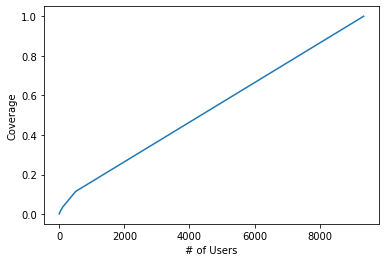

In [34]:
cumulative_rev_count = np.cumsum(sorted(df.groupby('user_id').agg({'business_id': len}).business_id.values, reverse=True))
g = plt.plot(cumulative_rev_count / float(cumulative_rev_count[-1]))
g[0].axes.set(xlabel='# of Users', ylabel='Coverage')

## Distribution of reviews counts by users

(array([8.861e+03, 4.710e+02, 1.800e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
 <BarContainer object of 14 artists>)

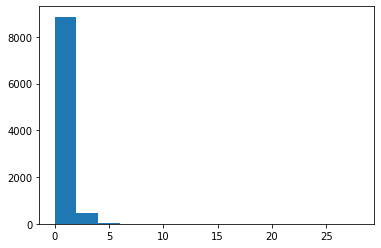

In [36]:
plt.hist(df.groupby('user_id').agg({'business_id': len}).business_id.values, bins=range(0,30,2))